In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [3]:
#get the quality cells
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/atac1.highqcells.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.LSI.csv'
cell2lsi=pd.read_csv(f,sep='\t')
cells_keep=list(cell2lsi.index)

print(len(cells_keep))
print(cells_keep)

2383
['R1.30,R2.68,R3.88,ARID1A_rep2', 'R1.78,R2.87,R3.52,BRD9_rep2', 'R1.30,R2.96,R3.61,ARID1A_rep2', 'R1.44,R2.64,R3.87,SMARCA4_rep2', 'R1.32,R2.03,R3.05,ARID1A_rep2', 'R1.33,R2.40,R3.07,SMARCA4_rep1', 'R1.20,R2.80,R3.11,ARID1A_rep1', 'R1.60,R2.06,R3.50,SMARCD2_rep2', 'R1.88,R2.90,R3.01,ARID1A_rep2', 'R1.30,R2.69,R3.21,ARID1A_rep2', 'R1.48,R2.33,R3.47,SMARCA4_rep2', 'R1.23,R2.78,R3.33,ARID1A_rep1', 'R1.17,R2.28,R3.24,ARID1A_rep1', 'R1.03,R2.27,R3.56,NTC_rep1', 'R1.29,R2.56,R3.45,ARID1A_rep2', 'R1.31,R2.23,R3.16,ARID1A_rep2', 'R1.46,R2.18,R3.68,SMARCA4_rep2', 'R1.94,R2.56,R3.07,SMARCA4_rep2', 'R1.39,R2.87,R3.55,SMARCA4_rep1', 'R1.93,R2.31,R3.46,SMARCA4_rep2', 'R1.01,R2.20,R3.53,NTC_rep1', 'R1.22,R2.14,R3.16,ARID1A_rep1', 'R1.26,R2.91,R3.13,ARID1A_rep2', 'R1.87,R2.01,R3.55,ARID1A_rep2', 'R1.64,R2.79,R3.12,SMARCD2_rep2', 'R1.24,R2.09,R3.67,ARID1A_rep1', 'R1.28,R2.55,R3.34,ARID1A_rep2', 'R1.38,R2.18,R3.56,SMARCA4_rep1', 'R1.49,R2.37,R3.13,SMARCD2_rep1', 'R1.07,R2.15,R3.15,NTC_rep1', 'R1.

In [5]:
import re

f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep1.bed.gz'
norm_factors={}
keep=cells_keep

for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    f=re.sub('COND',perturbation,f_template)
    print(f)
    frags1=pd.read_csv(f,sep='\t',header=None)
    
    #do just rep1 so we can normalize properly
    frags2=pd.read_csv(re.sub('rep1','rep2',f),sep='\t',header=None)
    frags=pd.concat([frags1,frags2],axis=0)
    
    frags=frags.loc[frags.iloc[:,3].isin(keep),:]
    norm_factors[perturbation]=frags.shape[0]
    
print(norm_factors)

/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.NTC_rep1.bed.gz
/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.ARID1A_rep1.bed.gz
/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.SMARCD2_rep1.bed.gz
/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.SMARCA4_rep1.bed.gz
/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.BRD9_rep1.bed.gz
{'NTC': 2747702, 'ARID1A': 5066144, 'SMARCD2': 1808970, 'SMARCA4': 4072291, 'BRD9': 2238269}


In [6]:
OUT='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

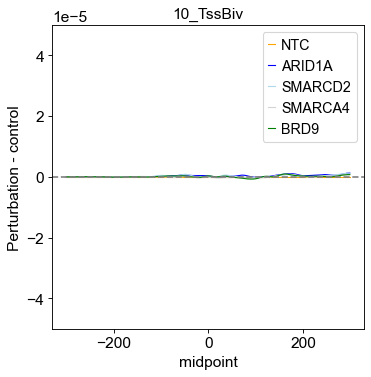

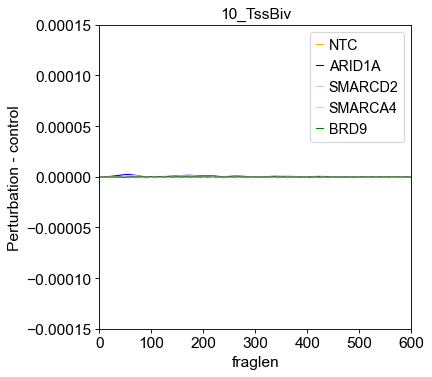

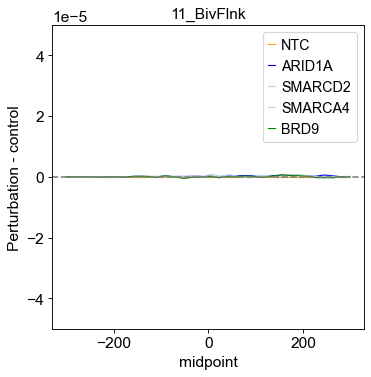

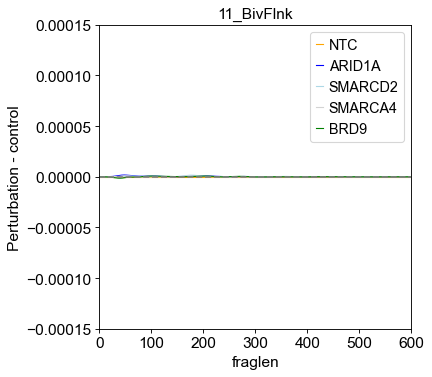

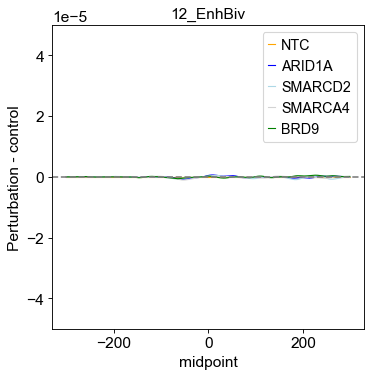

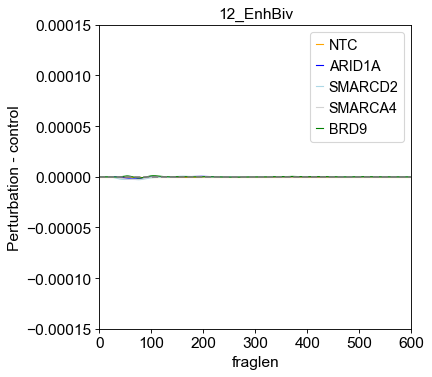

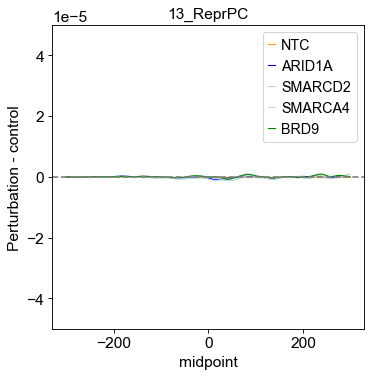

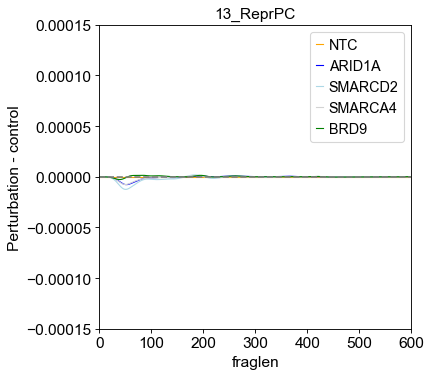

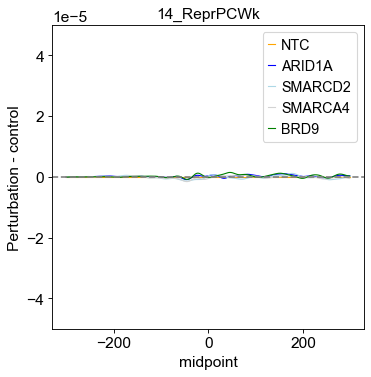

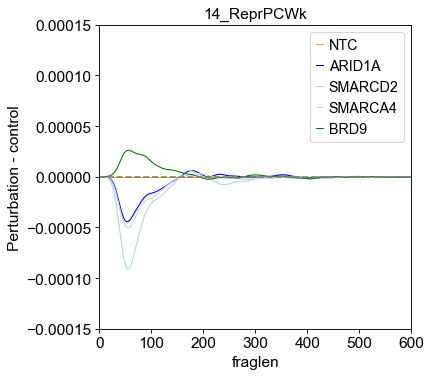

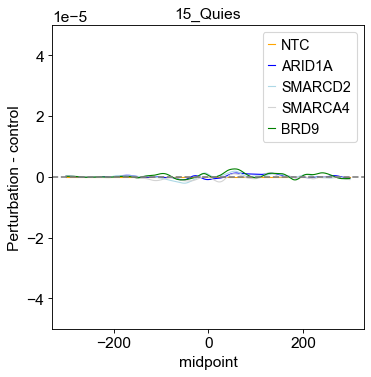

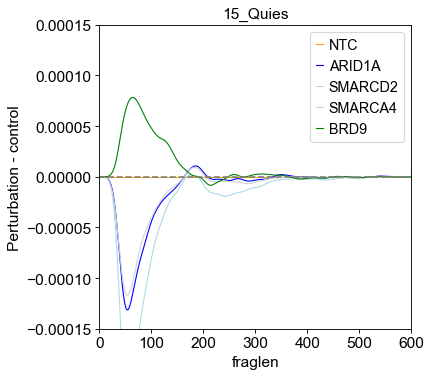

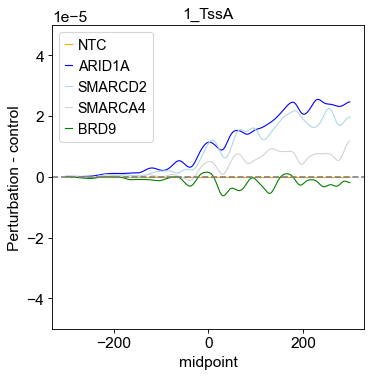

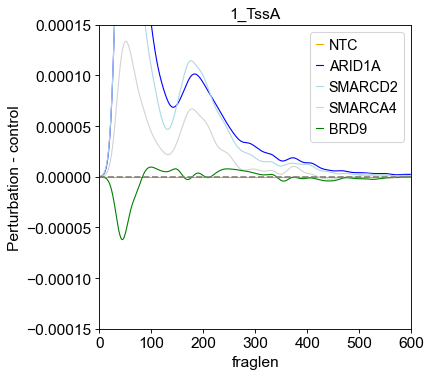

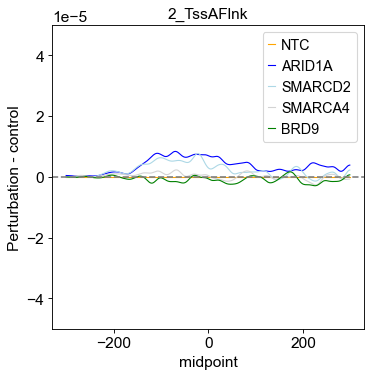

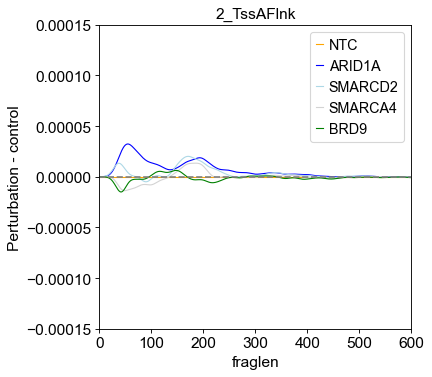

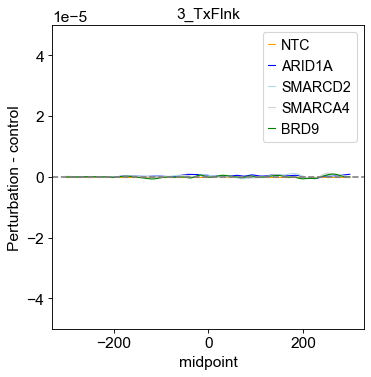

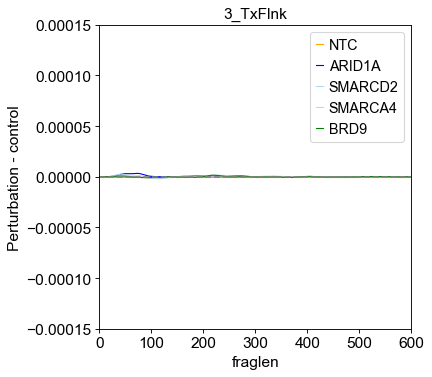

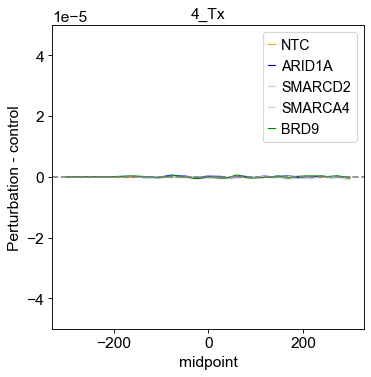

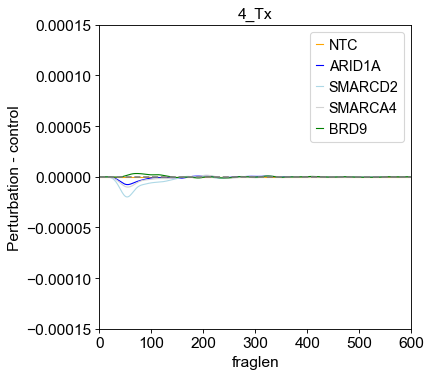

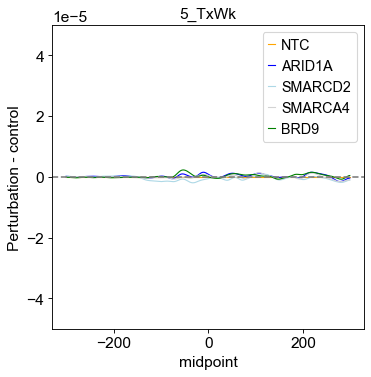

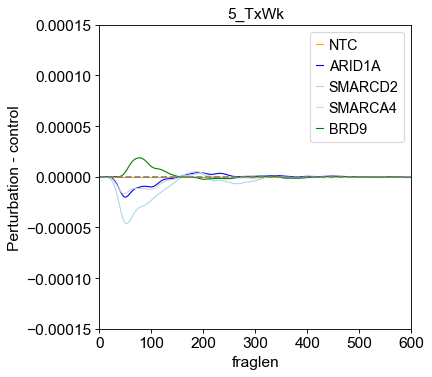

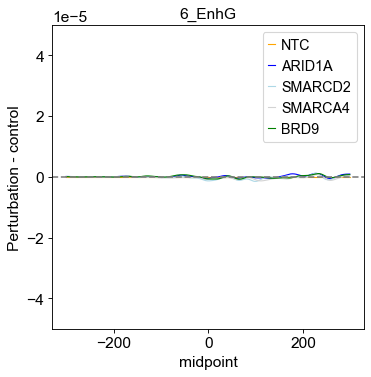

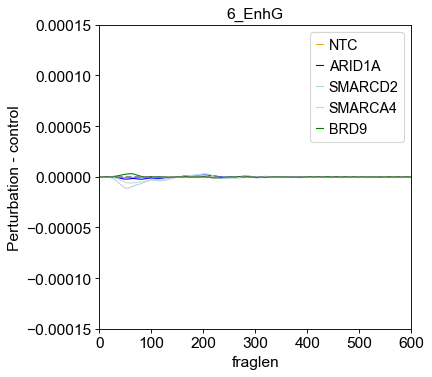

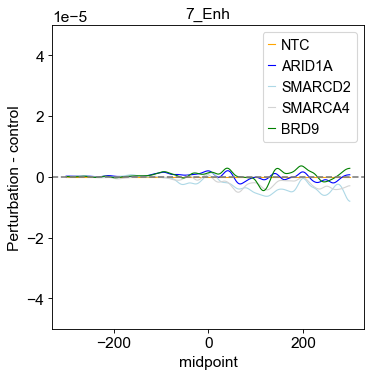

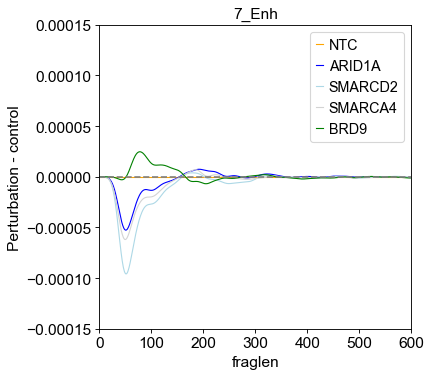

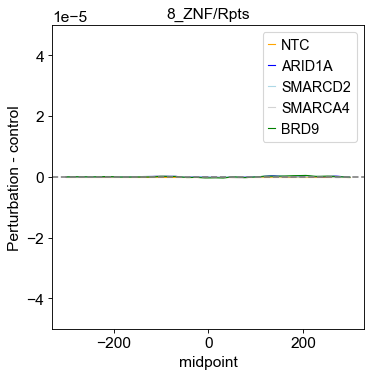

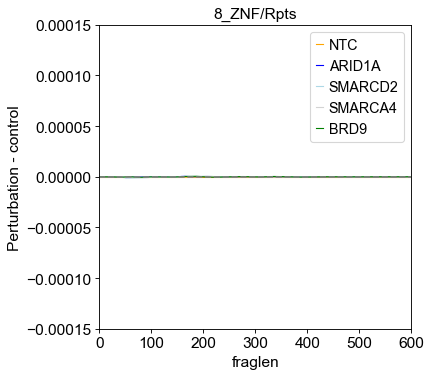

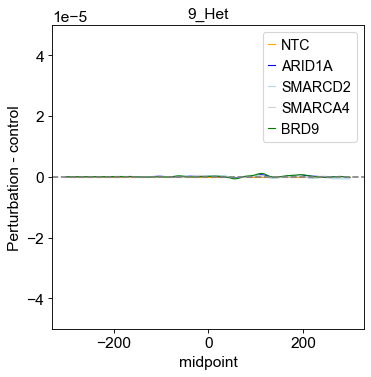

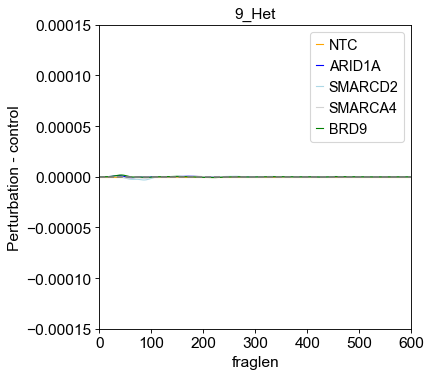

In [7]:
import re

ftemplate='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/SAMPLE.reads..W100.peaks.gz'
ftemplate='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/SAMPLE.reads.chromstate.W100.peaks.gz'

#================

for peaktype in ['10_TssBiv','11_BivFlnk',
                 '12_EnhBiv','13_ReprPC',
                 '14_ReprPCWk','15_Quies',
                 '1_TssA','2_TssAFlnk',
                 '3_TxFlnk','4_Tx','5_TxWk',
                 '6_EnhG','7_Enh','8_ZNF/Rpts',
                 '9_Het']:#['cBAFonly','ncBAFonly','PBAFonly']:

    def read_in_overlap(fhere,cells_highq,peaktype):
        df=pd.read_csv(fhere,sep='\t',header=None)
        df=df.loc[df.iloc[:,7].isin(cells_highq),:]
        df=df.loc[df.iloc[:,3]==peaktype,:]
        #df['fraglen']=df.iloc[:,5]-df.iloc[:,4]
        #df['midpoint']=0.5*(df.iloc[:,5]+df.iloc[:,4])-df.iloc[:,1]
        df['midpoint']=df.iloc[:,5]+0.5*df.iloc[:,8]-df.iloc[:,1]
        df['fraglen']=df.iloc[:,8].abs()
        return(df)


    dfs=[]
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        f=re.sub('SAMPLE',mysample,re.sub('PEAKS',peaktype,ftemplate))
        df_here=read_in_overlap(f,cells_keep,peaktype)
        df_here['ko']=mysample
        dfs.append(df_here)

    datas=pd.concat(dfs,axis=0)
    datas.head()

    to_plot='midpoint'

    palette={'NTC':'orange','ARID1A':'blue',
                       'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}


    data={}
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        data[mysample]=datas.loc[datas['ko']==mysample,to_plot]


    fig,plots=plt.subplots(1)
    fig.set_size_inches(5,5)

    bins=range(-300,300)

    for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

        if True:
            vals=np.histogram(data[perturbation],
                              bins,density=False)[0]/norm_factors[perturbation]-np.histogram(data['NTC'],
                                                            bins,density=False)[0]/norm_factors['NTC']
            from scipy.ndimage import gaussian_filter1d
            #vals=np.histogram(data[perturbation],bins,density=True)[0]
            vals=gaussian_filter1d(vals, 10)
            plots.plot(bins[:(len(bins)-1)],vals,
                          linewidth=1,
                     label = perturbation,color=palette[perturbation])
    plots.grid(False)
    plots.set_ylim(-0.00005,0.00005)

    plots.set_xlabel(to_plot)
    plots.set_ylabel('Counts')
    plots.set_ylabel('Perturbation - control')
    plots.axhline(y=0,color='gray',linestyle='--')
    plots.legend()
    plots.legend()
    plt.title(peaktype)

    #plt.savefig(OUT+to_plot+'.'+peaktype+'.pdf',transparent=True)
    plt.show()

    to_plot='fraglen'

    palette={'NTC':'orange','ARID1A':'blue',
                       'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}


    data={}
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        data[mysample]=datas.loc[datas['ko']==mysample,to_plot]


    fig,plots=plt.subplots(1)
    fig.set_size_inches(5,5)

    bins=range(600)

    for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

        if True:
            vals=np.histogram(data[perturbation],
                              bins,density=False)[0]/norm_factors[perturbation]-np.histogram(data['NTC'],
                                                            bins,density=False)[0]/norm_factors['NTC']
            from scipy.ndimage import gaussian_filter1d
            #vals=np.histogram(data[perturbation],bins,density=True)[0]
            vals=gaussian_filter1d(vals, 10)
            plots.plot(vals,
                          linewidth=1,
                     label = perturbation,color=palette[perturbation])
    plots.set_xlim(0,600)
    plots.set_ylim(-0.00015,0.00015)
    plots.grid(False)
    plt.title(peaktype)

    plots.set_xlabel(to_plot)
    plots.set_ylabel('Counts')
    plots.set_ylabel('Perturbation - control')
    plots.axhline(y=0,color='gray',linestyle='--')
    plots.legend()
    plots.legend()

df
       0       1       2       3      4       5       6  \
1  chr10  119600  120200  1_TssA  chr10  120138  120139   
2  chr10  119600  120200  1_TssA  chr10  120108  120109   
3  chr10  119600  120200  1_TssA  chr10  120159  120160   
4  chr10  119600  120200  1_TssA  chr10  120123  120124   
6  chr10  120200  122200  5_TxWk  chr10  120138  120139   

                               7    8  midpoint  fraglen  
1  R1.18,R2.62,R3.60,ARID1A_rep1 -172     452.0      172  
2  R1.22,R2.01,R3.58,ARID1A_rep1   52     534.0       52  
3  R1.22,R2.01,R3.58,ARID1A_rep1  -52     533.0       52  
4  R1.82,R2.53,R3.74,ARID1A_rep1  265     655.5      265  
6  R1.18,R2.62,R3.60,ARID1A_rep1 -172    -148.0      172  
df
       0       1       2       3      4       5       6  \
0  chr10  119600  120200  1_TssA  chr10  120151  120152   
1  chr10  119600  120200  1_TssA  chr10  120193  120194   
2  chr10  120200  122200  5_TxWk  chr10  120151  120152   
3  chr10  120200  122200  5_TxWk  chr10  120193  

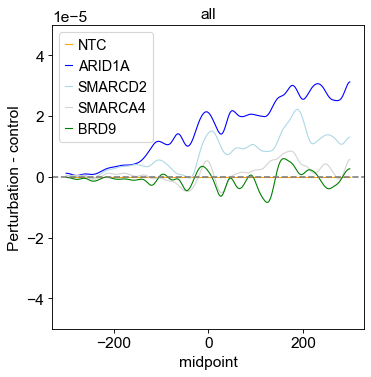

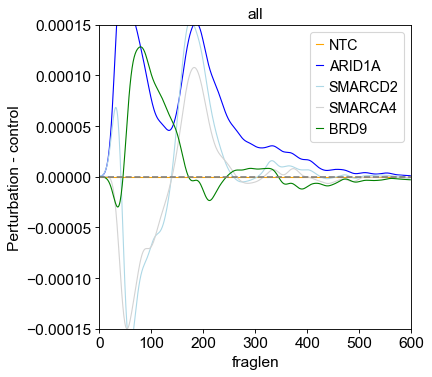

In [12]:
import re

ftemplate='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/SAMPLE.reads..W100.peaks.gz'
ftemplate='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2021-10-20/SAMPLE.reads.chromstate.W100.peaks.gz'
f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.tss.bed.gz' #.tss.bed.gz'


#================

for peaktype in ['all']:

    def read_in_overlap(fhere,cells_highq,peaktype):
        df=pd.read_csv(fhere,sep='\t',header=None)
        df=df.loc[df.iloc[:,7].isin(cells_highq),:]
        if peaktype!='all':
            df=df.loc[df.iloc[:,3]==peaktype,:]
        #df['fraglen']=df.iloc[:,5]-df.iloc[:,4]
        #df['midpoint']=0.5*(df.iloc[:,5]+df.iloc[:,4])-df.iloc[:,1]
        df['midpoint']=df.iloc[:,5]+0.5*df.iloc[:,8]-df.iloc[:,1]
        df['fraglen']=df.iloc[:,8].abs()
        return(df)


    dfs=[]
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        f=re.sub('SAMPLE',mysample,re.sub('PEAKS',peaktype,ftemplate))
        df_here=read_in_overlap(f,cells_keep,peaktype)
        print('df')
        print(df_here.head())
        df_here['ko']=mysample
        dfs.append(df_here)

    datas=pd.concat(dfs,axis=0)
    datas.head()

    to_plot='midpoint'

    palette={'NTC':'orange','ARID1A':'blue',
                       'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}


    data={}
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        data[mysample]=datas.loc[datas['ko']==mysample,to_plot]


    fig,plots=plt.subplots(1)
    fig.set_size_inches(5,5)

    bins=range(-300,300)

    for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

        if True:
            vals=np.histogram(data[perturbation],
                              bins,density=False)[0]/norm_factors[perturbation]-np.histogram(data['NTC'],
                                                            bins,density=False)[0]/norm_factors['NTC']
            from scipy.ndimage import gaussian_filter1d
            #vals=np.histogram(data[perturbation],bins,density=True)[0]
            vals=gaussian_filter1d(vals, 10)
            plots.plot(bins[:(len(bins)-1)],vals,
                          linewidth=1,
                     label = perturbation,color=palette[perturbation])
    plots.grid(False)
    plots.set_ylim(-0.00005,0.00005)

    plots.set_xlabel(to_plot)
    plots.set_ylabel('Counts')
    plots.set_ylabel('Perturbation - control')
    plots.axhline(y=0,color='gray',linestyle='--')
    plots.legend()
    plots.legend()
    plt.title(peaktype)

    #plt.savefig(OUT+to_plot+'.'+peaktype+'.pdf',transparent=True)
    plt.show()

    to_plot='fraglen'

    palette={'NTC':'orange','ARID1A':'blue',
                       'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}


    data={}
    for mysample in ['ARID1A','SMARCD2','SMARCA4','BRD9','NTC']:
        data[mysample]=datas.loc[datas['ko']==mysample,to_plot]


    fig,plots=plt.subplots(1)
    fig.set_size_inches(5,5)

    bins=range(600)

    for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

        if True:
            vals=np.histogram(data[perturbation],
                              bins,density=False)[0]/norm_factors[perturbation]-np.histogram(data['NTC'],
                                                            bins,density=False)[0]/norm_factors['NTC']
            from scipy.ndimage import gaussian_filter1d
            #vals=np.histogram(data[perturbation],bins,density=True)[0]
            vals=gaussian_filter1d(vals, 10)
            plots.plot(vals,
                          linewidth=1,
                     label = perturbation,color=palette[perturbation])
    plots.set_xlim(0,600)
    plots.set_ylim(-0.00015,0.00015)
    plots.grid(False)
    plt.title(peaktype)

    plots.set_xlabel(to_plot)
    plots.set_ylabel('Counts')
    plots.set_ylabel('Perturbation - control')
    plots.axhline(y=0,color='gray',linestyle='--')
    plots.legend()
    plots.legend()

In [13]:
#read the peak anno
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/peaks.anno.ChIP.bed'
peak_anno=pd.read_csv(f,sep='\t')
peak_anno.iloc[:,3:]=1.0*(peak_anno.iloc[:,3:]>0)
peak_anno.index=peak_anno['#chr']+'-'+peak_anno['start'].astype(str)+'-'+peak_anno['end'].astype(str)
peak_anno=peak_anno.drop(columns=['#chr','start','end'])
peak_anno=peak_anno.astype(float)
peak_anno.columns=['PBAF','ncBAF','cBAF','INPUT','SMARCA4']
peak_anno.head()

#give names to peak anno
subcomplex=[]
input_in=[]
smarca4=[]
for i in range(peak_anno.shape[0]):
    items=peak_anno.columns[peak_anno.iloc[i,:]>0]
    if 'INPUT' in items:
        input_in_entry='INPUT'
    else:
        input_in_entry='not'
    
    if "SMARCA4" in items:
        smarca4_entry='SMARCA4'
    else:
        smarca4_entry='not'
    
    #subcomplex
    items=list(set(items).intersection(set(['ncBAF','cBAF','PBAF'])))
    items.sort()
    if len(items)>0:
        subcomplex.append(','.join(items))
    else:
        subcomplex.append('Not bound by BAF')
    input_in.append(input_in_entry)
    smarca4.append(smarca4_entry)

peak_anno2=pd.DataFrame({'subcomplex':subcomplex},index=peak_anno.index)

In [20]:
frags.head()

,0,1,2,3,4
0,chr1,13475,13476,"R1.15,R2.03,R3.94,NTC_rep2",46
2,chr1,713972,713973,"R1.14,R2.71,R3.08,NTC_rep2",77
3,chr1,714040,714041,"R1.12,R2.76,R3.46,NTC_rep2",90
4,chr1,714040,714041,"R1.11,R2.05,R3.12,NTC_rep2",130
5,chr1,714125,714126,"R1.15,R2.03,R3.94,NTC_rep2",45


In [23]:
peaktype_peaks

['chr1-96428-96668',
 'chr1-237621-237832',
 'chr1-521434-521639',
 'chr1-713694-714353',
 'chr1-752409-752812',
 'chr1-762588-763106',
 'chr1-773694-773968',
 'chr1-805160-805464',
 'chr1-811859-812126',
 'chr1-832688-832958',
 'chr1-839968-840206',
 'chr1-840603-840812',
 'chr1-842127-842456',
 'chr1-848181-848486',
 'chr1-856444-856675',
 'chr1-859090-859418',
 'chr1-860204-860642',
 'chr1-875648-876032',
 'chr1-876881-877453',
 'chr1-894340-894925',
 'chr1-895829-896101',
 'chr1-901831-902549',
 'chr1-911392-911769',
 'chr1-919429-919790',
 'chr1-935369-935710',
 'chr1-935892-936402',
 'chr1-948292-949075',
 'chr1-954540-955207',
 'chr1-968183-968657',
 'chr1-974204-974427',
 'chr1-975775-976307',
 'chr1-994474-995194',
 'chr1-999289-999858',
 'chr1-1004532-1004885',
 'chr1-1014778-1015556',
 'chr1-1027014-1027461',
 'chr1-1039325-1039857',
 'chr1-1051173-1052052',
 'chr1-1057567-1057806',
 'chr1-1079578-1080028',
 'chr1-1092796-1093726',
 'chr1-1143362-1143887',
 'chr1-1166830-116

/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.peak.bed.tss.gz


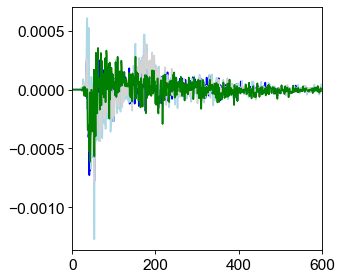

In [33]:
f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.peak.bed.tss.gz' #.tss.bed.gz'

print(f_template)
frag_d={}
palette={'NTC':'dimgray','ARID1A':'blue',
                   'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    f=re.sub('COND',perturbation,f_template)
    frags1=pd.read_csv(f,sep='\t',header=None)
    frags2=pd.read_csv(re.sub('rep2','rep1',f),sep='\t',header=None)
    frags=pd.concat([frags1,frags2],axis=0)
    frags=frags.loc[frags.iloc[:,3].isin(keep),:]
    
    frag_d[perturbation]=frags.iloc[:,4]
    
    if perturbation=='NTC':
        continue
    bins=[2*x for x in range(300)]
    bins=range(600)
    #plt.plot(np.log2(np.histogram(frag_d[perturbation],bins,density=True)[0]/np.histogram(frag_d['NTC'],
    #                                                                                      bins,density=True)[0]),
    #             label = 'test',color=palette[perturbation])
    plt.plot(np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
                                                                                          bins,density=True)[0],
                 label = 'test',color=palette[perturbation])
    plt.xlim(0,600)
    plt.grid(False)

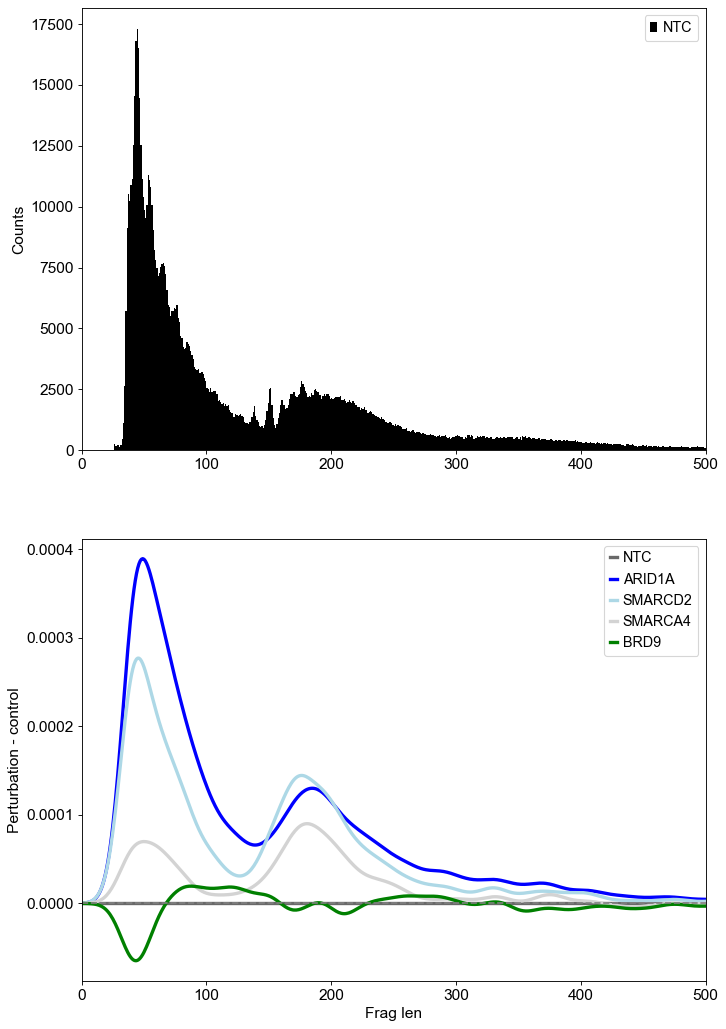

In [28]:
fig,plots=plt.subplots(2,1)

fig.set_size_inches(10,16)
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

    
    if perturbation=='NTC':
        bins=range(0,601)
        a=plots[0].hist(frag_d[perturbation],bins,color='black',label='NTC')
    if True:
    #else:
        #vals=np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
        #                                                                                  bins,density=True)[0]
        from scipy.ndimage import gaussian_filter1d
        #vals=np.histogram(frag_d[perturbation],bins,density=True)[0]
        #vals=np.histogram(frag_d[perturbation],bins,density=False)[0]/norm_factors[perturbation]
        vals=np.histogram(frag_d[perturbation],bins,density=False)[0]/norm_factors[perturbation]-np.histogram(frag_d['NTC'],bins,density=False)[0]/norm_factors['NTC']
        vals=gaussian_filter1d(vals, 10)
        plots[1].plot(range(0,600),
                      vals,
                      linewidth=3,
                 label = perturbation,color=palette[perturbation])
plots[0].set_xlim(0,500)
plots[1].set_xlim(0,500)
plots[0].grid(False)
plots[1].grid(False)
#plots[1].set_ylim(-0.0004,0.0004)

'''
plots[0].axvline(x=146,color='gray',linestyle='--')
plots[1].axvline(x=146,color='gray',linestyle='--')

plots[0].axvline(x=2*146,color='gray',linestyle='--')
plots[1].axvline(x=2*146,color='gray',linestyle='--')

plots[0].axvline(x=3*146,color='gray',linestyle='--')
plots[1].axvline(x=3*146,color='gray',linestyle='--')

plots[0].axvline(x=4*146,color='gray',linestyle='--')
plots[1].axvline(x=4*146,color='gray',linestyle='--')
'''

plots[1].set_xlabel('Frag len')
plots[0].set_ylabel('Counts')
plots[1].set_ylabel('Perturbation - control')
plots[1].axhline(y=0,color='gray',linestyle='--')
plots[1].legend()
plots[0].legend()

/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.peak.bed.nontss.gz


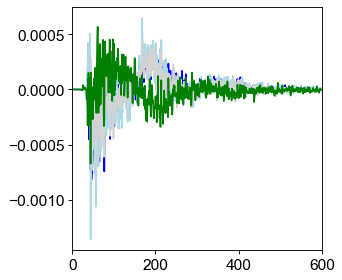

In [25]:
f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.peak.bed.nontss.gz' #.tss.bed.gz'

print(f_template)
frag_d={}
palette={'NTC':'dimgray','ARID1A':'blue',
                   'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    f=re.sub('COND',perturbation,f_template)
    frags1=pd.read_csv(f,sep='\t',header=None)
    frags2=pd.read_csv(re.sub('rep2','rep1',f),sep='\t',header=None)
    frags=pd.concat([frags1,frags2],axis=0)
    frags=frags.loc[frags.iloc[:,3].isin(keep),:]
   
    frag_d[perturbation]=frags.iloc[:,4]

    
    if perturbation=='NTC':
        continue
    bins=[2*x for x in range(300)]
    bins=range(600)
    #plt.plot(np.log2(np.histogram(frag_d[perturbation],bins,density=True)[0]/np.histogram(frag_d['NTC'],
    #                                                                                      bins,density=True)[0]),
    #             label = 'test',color=palette[perturbation])
    plt.plot(np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
                                                                                          bins,density=True)[0],
                 label = 'test',color=palette[perturbation])
    plt.xlim(0,600)
    plt.grid(False)

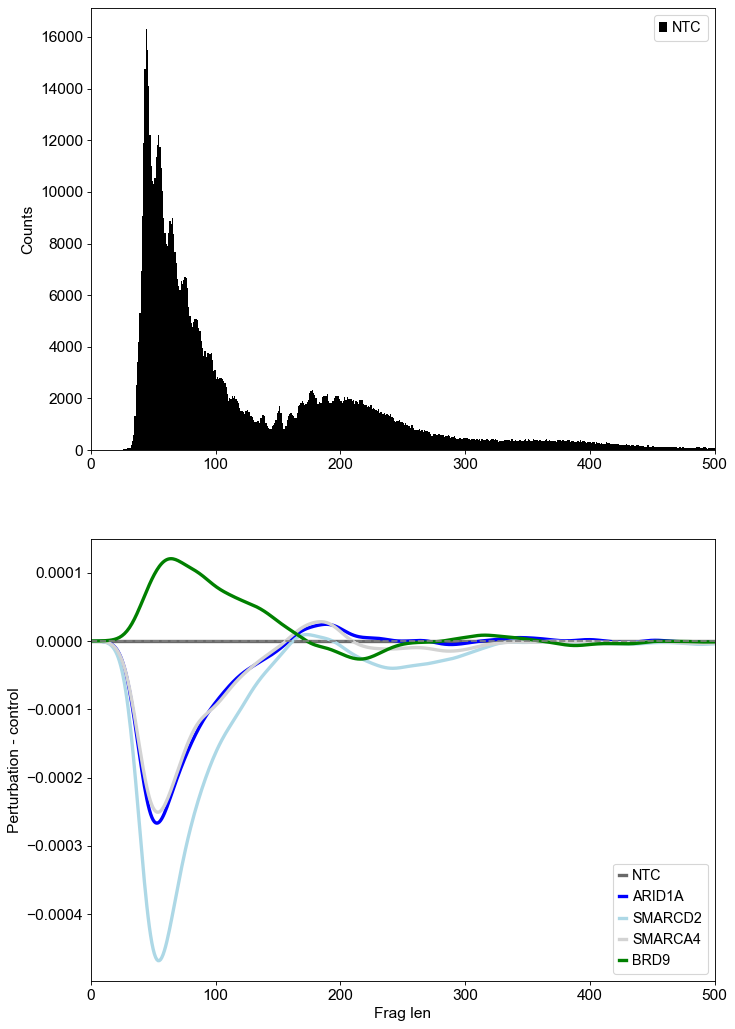

In [26]:
fig,plots=plt.subplots(2,1)

fig.set_size_inches(10,16)
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:

    
    if perturbation=='NTC':
        bins=range(0,601)
        a=plots[0].hist(frag_d[perturbation],bins,color='black',label='NTC')
    if True:
    #else:
        #vals=np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
        #                                                                                  bins,density=True)[0]
        from scipy.ndimage import gaussian_filter1d
        #vals=np.histogram(frag_d[perturbation],bins,density=True)[0]
        #vals=np.histogram(frag_d[perturbation],bins,density=False)[0]/norm_factors[perturbation]
        vals=np.histogram(frag_d[perturbation],bins,
                          density=False)[0]/norm_factors[perturbation]-np.histogram(frag_d['NTC'],
                                                                                    bins,density=False)[0]/norm_factors['NTC']
        vals=gaussian_filter1d(vals, 10)
        plots[1].plot(range(0,600),
                      vals,
                      linewidth=3,
                 label = perturbation,color=palette[perturbation])
plots[0].set_xlim(0,500)
plots[1].set_xlim(0,500)
plots[0].grid(False)
plots[1].grid(False)
#plots[1].set_ylim(-0.0004,0.0004)

'''
plots[0].axvline(x=146,color='gray',linestyle='--')
plots[1].axvline(x=146,color='gray',linestyle='--')

plots[0].axvline(x=2*146,color='gray',linestyle='--')
plots[1].axvline(x=2*146,color='gray',linestyle='--')

plots[0].axvline(x=3*146,color='gray',linestyle='--')
plots[1].axvline(x=3*146,color='gray',linestyle='--')

plots[0].axvline(x=4*146,color='gray',linestyle='--')
plots[1].axvline(x=4*146,color='gray',linestyle='--')
'''

plots[1].set_xlabel('Frag len')
plots[0].set_ylabel('Counts')
plots[1].set_ylabel('Perturbation - control')
plots[1].axhline(y=0,color='gray',linestyle='--')
plots[1].legend()
plots[0].legend()

/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.tss.bed.gz


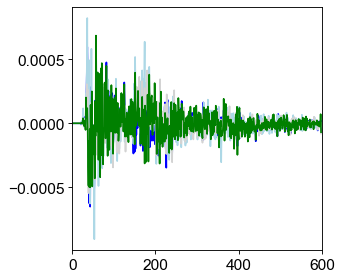

In [46]:
f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.tss.bed.gz' #.tss.bed.gz'

print(f_template)
frag_d={}
palette={'NTC':'dimgray','ARID1A':'blue',
                   'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    f=re.sub('COND',perturbation,f_template)
    frags1=pd.read_csv(f,sep='\t',header=None)
    frags2=pd.read_csv(re.sub('rep2','rep1',f),sep='\t',header=None)
    frags=pd.concat([frags1,frags2],axis=0)
    frags=frags.loc[frags.iloc[:,3].isin(keep),:]    
    
    frag_d[perturbation]=frags.iloc[:,4]
    
    if perturbation=='NTC':
        continue
    bins=[2*x for x in range(300)]
    bins=range(600)
    #plt.plot(np.log2(np.histogram(frag_d[perturbation],bins,density=True)[0]/np.histogram(frag_d['NTC'],
    #                                                                                      bins,density=True)[0]),
    #             label = 'test',color=palette[perturbation])
    plt.plot(np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
                                                                                          bins,density=True)[0],
                 label = 'test',color=palette[perturbation])
    plt.xlim(0,600)
    plt.grid(False)

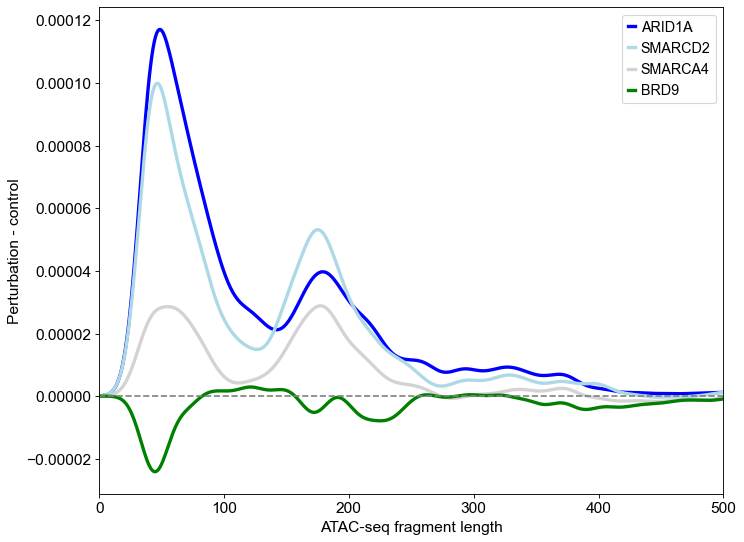

In [47]:
fig,plots=plt.subplots()

fig.set_size_inches(10,8)
for perturbation in ['ARID1A','SMARCD2','SMARCA4','BRD9']:

        bins=range(0,601)
        from scipy.ndimage import gaussian_filter1d
        vals=np.histogram(frag_d[perturbation],bins,
                          density=False)[0]/norm_factors[perturbation]-np.histogram(frag_d['NTC'],
                                                                                    bins,density=False)[0]/norm_factors['NTC']
        vals=gaussian_filter1d(vals, 10)
        plots.plot(range(0,600),
                      vals,
                      linewidth=3,
                 label = perturbation,color=palette[perturbation])
plots.set_xlim(0,500)
plots.grid(False)

plots.set_xlabel('ATAC-seq fragment length')
plots.set_ylabel('Perturbation - control')
plots.axhline(y=0,color='gray',linestyle='--')
plots.legend()
plt.savefig(OUT+'TSS_fraglen.pdf',transparent=True)

/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.nontss.bed.gz


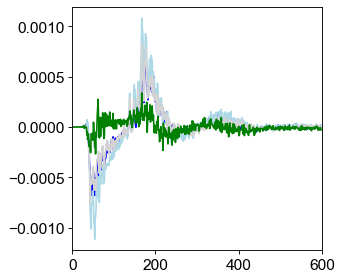

In [48]:
f_template='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/split_fragfiles.COND_rep2.bed.gz.nontss.bed.gz' #.tss.bed.gz'

print(f_template)
frag_d={}
palette={'NTC':'dimgray','ARID1A':'blue',
                   'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'green'}
for perturbation in ['NTC','ARID1A','SMARCD2','SMARCA4','BRD9']:
    f=re.sub('COND',perturbation,f_template)
    frags1=pd.read_csv(f,sep='\t',header=None)
    frags2=pd.read_csv(re.sub('rep2','rep1',f),sep='\t',header=None)
    frags=pd.concat([frags1,frags2],axis=0)
    frags=frags.loc[frags.iloc[:,3].isin(keep),:]
   
    frag_d[perturbation]=frags.iloc[:,4]

    
    if perturbation=='NTC':
        continue
    bins=[2*x for x in range(300)]
    bins=range(600)
    plt.plot(np.histogram(frag_d[perturbation],bins,density=True)[0]-np.histogram(frag_d['NTC'],
                                                                                          bins,density=True)[0],
                 label = 'test',color=palette[perturbation])
    plt.xlim(0,600)
    plt.grid(False)

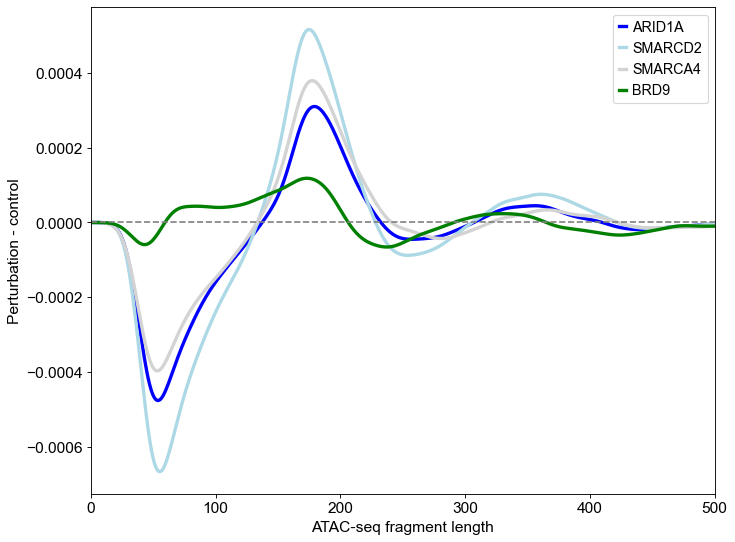

In [49]:
fig,plots=plt.subplots()

fig.set_size_inches(10,8)
for perturbation in ['ARID1A','SMARCD2','SMARCA4','BRD9']:

        bins=range(0,601)
        from scipy.ndimage import gaussian_filter1d
        vals=np.histogram(frag_d[perturbation],bins,
                          density=False)[0]/norm_factors[perturbation]-np.histogram(frag_d['NTC'],
                                                                                    bins,density=False)[0]/norm_factors['NTC']
        vals=gaussian_filter1d(vals, 10)
        plots.plot(range(0,600),
                      vals,
                      linewidth=3,
                 label = perturbation,color=palette[perturbation])
plots.set_xlim(0,500)
plots.grid(False)

plots.set_xlabel('ATAC-seq fragment length')
plots.set_ylabel('Perturbation - control')
plots.axhline(y=0,color='gray',linestyle='--')
plots.legend()

plt.savefig(OUT+'nonTSS_fraglen.pdf',transparent=True)

In [45]:
OUT

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'